In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline 

from sklearn.externals import joblib 

from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import r2_score

# import dataset 


In [409]:
housing_df = pd.read_csv("D:\\Data_Challenge\\Python Data Wrangling\\kaggle_california_housing_prices\\housing.csv")

In [410]:
print(housing_df.sample(5))
print(housing_df.shape)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
19642    -120.81     37.53                15.0        570.0           123.0   
1405     -122.06     37.96                10.0       7136.0          1691.0   
20528    -121.80     38.55                11.0       5121.0           899.0   
2121     -119.70     36.75                11.0       3626.0           779.0   
14462    -117.27     32.85                26.0       1373.0             NaN   

       population  households  median_income  median_house_value  \
19642       189.0       107.0         1.8750            181300.0   
1405       2959.0      1507.0         3.9816            182000.0   
20528      2258.0       901.0         4.7168            223200.0   
2121       1819.0       731.0         2.4956             87500.0   
14462       608.0       268.0         4.4250            475000.0   

      ocean_proximity  
19642          INLAND  
1405         NEAR BAY  
20528          INLAND  
2121           INLAN

In [411]:
housing_df.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  
6      1094.0       514.0         3.6591            299200.0        NEAR BAY  
7      1157.0       647.0         3.1200            241400.0        NEAR BAY  
8      1206.0       595.0         2.0804            226700.0        NEAR BAY  
9      1551.0       714.0         3.6912            261100.0        NEAR BAY

# handling missing values 

## drop rows with missing value

In [412]:
housing_df = housing_df.dropna()

In [413]:
housing_df.shape

(20433, 10)

In [414]:
housing_df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563700   
50%        435.000000   1166.000000    409.000000       3.536500   
75%        647.000000   1722.000000    604.000000       4.744000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20433.000000  
mean        206864.413155  
std         115435.667099  
min          14999.000000  
25%         119500.000000  
50%         179700.000000  
75%         264700.000000  
max         500001.000000

# exploring data set using visualizatiuon

In [415]:
housing_df.loc[housing_df['median_house_value'] == 500001.000000].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

### filter by condition using df.loc[]

### avoid an upper cap ==> too many occurrence of a column value  

to avoid this upper cap, we hae to identify the index of records with the same value, and then drop the corresponding rows

In [416]:
housing_df = housing_df.drop(housing_df.loc[housing_df['median_house_value'] == 500001].index)

In [417]:
housing_df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  19475.000000  19475.000000        19475.000000  19475.000000   
mean    -119.564306     35.653372           28.378074   2620.491142   
std        2.006241      2.150250           12.515373   2184.938093   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.760000     33.930000           18.000000   1441.000000   
50%     -118.500000     34.270000           28.000000   2111.000000   
75%     -117.990000     37.730000           37.000000   3118.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    19475.000000  19475.000000  19475.000000   19475.000000   
mean       539.645751   1440.290732    501.093504       3.676739   
std        422.413200   1144.399323    383.206416       1.569263   
min          2.000000      3.000000      2.000000       0.499900   
25%        297.000000    796.000000    282.000000       2.526500   
50%        436.000000   1178.000000    411.000000       3.451900   
75%        648.000000   1743.000000    606.000000       4.583300   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        19475.000000  
mean        192444.651913  
std          97702.625782  
min          14999.000000  
25%         116500.000000  
50%         173800.000000  
75%         248100.000000  
max         500000.000000

In [418]:
housing_df.shape

(19475, 10)

In [419]:
housing_df.head(15)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -122.23     37.88                41.0        880.0           129.0   
1     -122.22     37.86                21.0       7099.0          1106.0   
2     -122.24     37.85                52.0       1467.0           190.0   
3     -122.25     37.85                52.0       1274.0           235.0   
4     -122.25     37.85                52.0       1627.0           280.0   
5     -122.25     37.85                52.0        919.0           213.0   
6     -122.25     37.84                52.0       2535.0           489.0   
7     -122.25     37.84                52.0       3104.0           687.0   
8     -122.26     37.84                42.0       2555.0           665.0   
9     -122.25     37.84                52.0       3549.0           707.0   
10    -122.26     37.85                52.0       2202.0           434.0   
11    -122.26     37.85                52.0       3503.0           752.0   
12    -122.26     37.85                52.0       2491.0           474.0   
13    -122.26     37.84                52.0        696.0           191.0   
14    -122.26     37.85                52.0       2643.0           626.0   

    population  households  median_income  median_house_value ocean_proximity  
0        322.0       126.0         8.3252            452600.0        NEAR BAY  
1       2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2        496.0       177.0         7.2574            352100.0        NEAR BAY  
3        558.0       219.0         5.6431            341300.0        NEAR BAY  
4        565.0       259.0         3.8462            342200.0        NEAR BAY  
5        413.0       193.0         4.0368            269700.0        NEAR BAY  
6       1094.0       514.0         3.6591            299200.0        NEAR BAY  
7       1157.0       647.0         3.1200            241400.0        NEAR BAY  
8       1206.0       595.0         2.0804            226700.0        NEAR BAY  
9       1551.0       714.0         3.6912            261100.0        NEAR BAY  
10       910.0       402.0         3.2031            281500.0        NEAR BAY  
11      1504.0       734.0         3.2705            241800.0        NEAR BAY  
12      1098.0       468.0         3.0750            213500.0        NEAR BAY  
13       345.0       174.0         2.6736            191300.0        NEAR BAY  
14      1212.0       620.0         1.9167            159200.0        NEAR BAY

In [420]:
housing_df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

## One hot Encoding to the column ocean_proximity

In [421]:
housing_df = pd.get_dummies(housing_df, columns = ["ocean_proximity"])

In [422]:
housing_df.sample(15)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
6307     -117.87     33.99                21.0       2837.0           515.0   
15382    -117.14     33.39                17.0       2889.0           587.0   
15469    -117.21     33.16                13.0       2937.0           698.0   
19656    -120.85     37.49                42.0        264.0            72.0   
6161     -117.94     34.08                32.0       2704.0           514.0   
10980    -117.84     33.77                26.0       3350.0           581.0   
13198    -117.69     34.06                29.0        873.0           226.0   
354      -122.17     37.76                40.0       1685.0           343.0   
7364     -118.20     33.97                43.0        825.0           212.0   
18645    -121.98     36.96                20.0       3495.0           818.0   
11694    -117.98     33.89                18.0       2939.0           437.0   
6809     -118.11     34.10                20.0       3090.0           802.0   
6356     -117.96     34.14                 9.0        907.0           207.0   
15732    -122.44     37.78                52.0       2747.0           736.0   
7832     -118.16     33.90                28.0       2410.0           616.0   

       population  households  median_income  median_house_value  \
6307       2031.0       555.0         4.9271            209700.0   
15382      1931.0       510.0         3.8547            208300.0   
15469      1246.0       579.0         2.6487            196000.0   
19656       310.0        70.0         1.4063             61500.0   
6161       1669.0       497.0         4.4653            195400.0   
10980      1314.0       550.0         3.5195            249100.0   
13198       649.0       198.0         2.7986            114400.0   
354         949.0       342.0         1.8426             94800.0   
7364        820.0       184.0         1.8897            174300.0   
18645      2186.0       772.0         3.1167            258300.0   
11694      1278.0       435.0         7.1425            393700.0   
6809       2109.0       738.0         3.3801            192500.0   
6356        619.0       194.0         3.9464            179600.0   
15732      1309.0       653.0         2.9430            341700.0   
7832       2399.0       594.0         2.7339            156700.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
6307                           1                       0   
15382                          1                       0   
15469                          1                       0   
19656                          0                       1   
6161                           1                       0   
10980                          1                       0   
13198                          0                       1   
354                            0                       0   
7364                           1                       0   
18645                          0                       0   
11694                          1                       0   
6809                           1                       0   
6356                           0                       1   
15732                          0                       0   
7832                           1                       0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
6307                        0                         0   
15382                       0                         0   
15469                       0                         0   
19656                       0                         0   
6161                        0                         0   
10980                       0                         0   
13198                       0                         0   
354                         0                         1   
7364                        0                         0   
18645                       0                         0   
11694                       0              

In [423]:
housing_df.shape

(19475, 14)

## create Training Set with X & Y, and so on fot the test set

In [424]:
X = housing_df.drop('median_house_value', axis =1)
Y = housing_df['median_house_value']

In [425]:
print(X.shape)
print(Y.shape)

(19475, 13)
(19475,)


## Data Partitionning 

In [426]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 4)

In [427]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15580, 13)
(3895, 13)
(15580,)
(3895,)


## Linear Regression Estimator with built in normalization

In [428]:
linear_model = LinearRegression(normalize = True).fit(x_train,y_train)

In [429]:
print("Training score : ", linear_model.score(x_train, y_train))

Training score :  0.6126579392056192


#### R^2 is a measure of how well our linear model captures the underlying variation in our training data

#### the training score of the Linear Regression algorythms is R-Square : R^2 

In [430]:
predictors = x_train.columns

In [431]:
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

### use the model to predict the y_test by passing the x_test

In [432]:
y_pred = linear_model.predict(x_test)

In [433]:
y_pred

array([318175.82862078, 133412.3378468 , 221875.54859562, ...,
       208436.94015016, 271485.93740232, 347342.76913175])

In [434]:
df_pred_actual = pd.DataFrame({'predicted' : y_pred, 'actual' : y_test})

df_pred_actual.head(15)

predicted    actual
12733  318175.828621  320200.0
9062   133412.337847  107500.0
16677  221875.548596  236100.0
7172   144202.385544  133000.0
18475  217370.081797  239300.0
8125   229447.284508  216700.0
2664   149925.060465  101900.0
14257  138059.924322   79400.0
1568   313319.694374  324600.0
6441   142310.236515  201700.0
14024  233978.961298  302200.0
4450   142568.343392  168800.0
16159  206143.120123  318500.0
19952  130348.222497   78200.0
18427  205780.293428  123400.0

## Model Evaluation  - R^2 on testing data

In [435]:
print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.6129568499484437


### Data vizualization

### scatter plot 

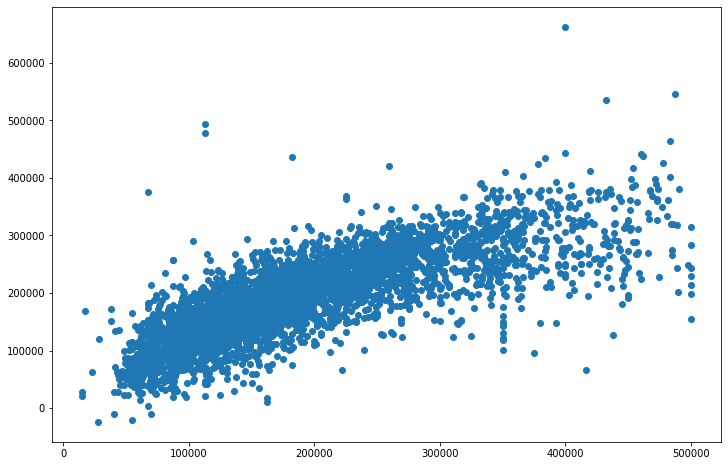

In [436]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(y_test, y_pred)
plt.show()

In [437]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [438]:
df_pred_actual_sample.head()

index      predicted    actual
0   4013  313232.055847  338500.0
1  11173  219902.540683  200900.0
2   5199  102740.594592   94100.0
3  18763   68603.223591  105400.0
4   2708  107646.880162  125000.0

## Line Chart

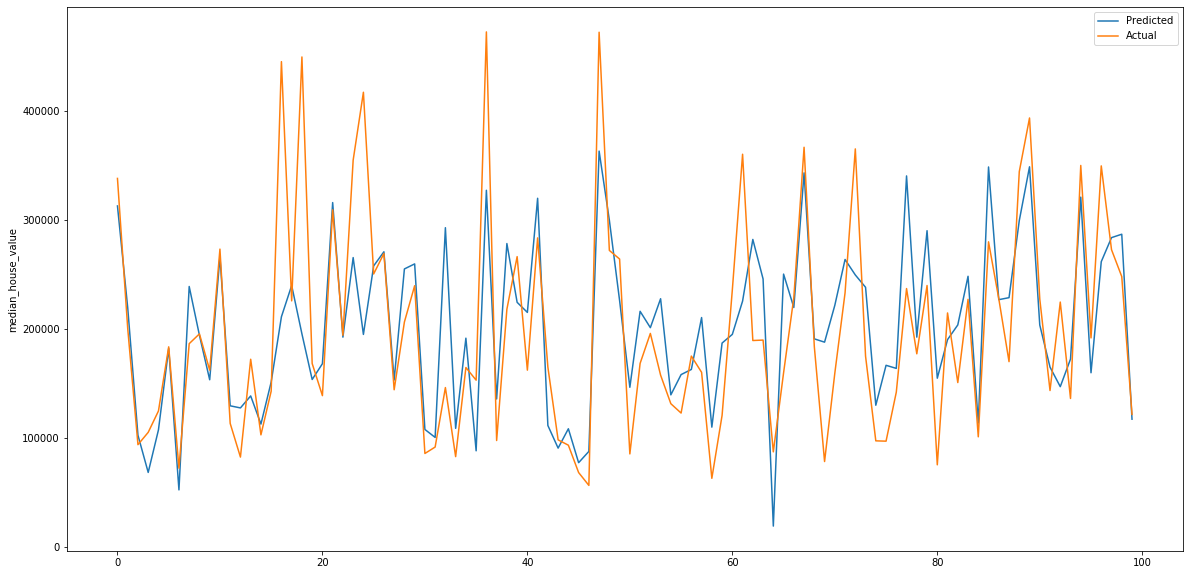

In [439]:
plt.figure(figsize = (20,10))

plt.plot(df_pred_actual_sample['predicted'], label ='Predicted')
plt.plot(df_pred_actual_sample['actual'], label ='Actual')

plt.ylabel('median_house_value')
plt.legend()
plt.show()

# Scikit learn using pipelines

## Load dataset 

In [440]:
house_df = pd.read_csv("D:\\Data_Challenge\\Python Data Wrangling\\kaggle_california_housing_prices\\housing.csv")

In [441]:
house_df.sample(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
19956    -119.33     36.22                 9.0       3748.0           644.0   
13804    -117.55     34.25                39.0       1578.0           317.0   
3728     -118.43     34.18                31.0       2417.0           510.0   
515      -122.24     37.83                52.0       1757.0           246.0   
11978    -117.49     33.99                21.0       2050.0           392.0   
9594     -120.46     37.33                17.0       6111.0          1171.0   
9777     -121.12     36.21                16.0       1720.0           473.0   
3087     -118.87     35.65                33.0       1504.0           325.0   
3221     -119.66     36.33                10.0       1623.0           409.0   
10072    -120.17     39.33                10.0        614.0           141.0   

       population  households  median_income  median_house_value  \
19956      1955.0       620.0         4.2011            108100.0   
13804       872.0       322.0         4.5550            153100.0   
3728       1102.0       507.0         3.8906            282200.0   
515         585.0       227.0         5.8948            457800.0   
11978      1153.0       336.0         4.8400            116400.0   
9594       2950.0      1104.0         3.2852             98800.0   
9777       1427.0       291.0         2.1107             76200.0   
3087        584.0       223.0         3.4792             94600.0   
3221        988.0       395.0         1.4194             58100.0   
10072       195.0        95.0         0.9283            116300.0   

      ocean_proximity  
19956          INLAND  
13804          INLAND  
3728        <1H OCEAN  
515          NEAR BAY  
11978          INLAND  
9594           INLAND  
9777        <1H OCEAN  
3087           INLAND  
3221           INLAND  
10072          INLAND

In [442]:
house_df.shape

(20640, 10)

## Handle missing values in method

In [443]:
def handle_missing_values():
    global house_df 
    house_df = house_df.dropna()
    return house_df

house_df = handle_missing_values()

## Data Partitioning

In [444]:
# Extracting target variable from the Dataset 

X =  house_df.drop('ocean_proximity', axis = 1)

In [445]:
Y = house_df.ocean_proximity

In [446]:
X.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  
0       322.0       126.0         8.3252            452600.0  
1      2401.0      1138.0         8.3014            358500.0  
2       496.0       177.0         7.2574            352100.0  
3       558.0       219.0         5.6431            341300.0  
4       565.0       259.0         3.8462            342200.0

In [447]:
Y.head()

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
Name: ocean_proximity, dtype: object

In [448]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 4)

## Pipeline - training the classification model 

In [449]:
linearSVC_pipeline = Pipeline(
[
    #('handle_missing_values1', handle_missing_values()),
    #(pca1,PCA(n_components=2)),
    ('data_normalization_z_score1', StandardScaler() ),
    ('linear_svc', LinearSVC(random_state=0, tol=1e-5, max_iter = 2000000))
]
)


kNeighbors_pipeline = Pipeline(
[
    #('handle_missing_values2', handle_missing_values()),
    ('data_normalization_z_score2', StandardScaler() ),
    ('kNeighbors', KNeighborsClassifier(n_neighbors=3))
])

In [450]:
pipelines = [linearSVC_pipeline, kNeighbors_pipeline]


In [451]:
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

In [454]:
#Dictionary of pipelines and classifier types for ease of reference 
pipelines_dict = {0: 'linearSVC_pipeline', 
                 1: 'KNeighbors_pipeline'}

# Fit the pipelines
for pipeline in pipelines:
    pipeline.fit(x_train, y_train)

## models accuracy 

In [464]:
for i, model in enumerate(pipelines):
    print("{} Test Accuracy : {}".format(pipelines_dict[i], model.score(x_test, y_test)))

linearSVC_pipeline Test Accuracy : 0.7978957670663078
KNeighbors_pipeline Test Accuracy : 0.8125764619525324


In [466]:
for i,model in enumerate(pipelines):
    if model.score(x_test,y_test) > best_accuracy:
        best_accuracy=model.score(x_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipelines_dict[best_classifier]))

Classifier with best accuracy:KNeighbors_pipeline
